#  Business problem understanding
      . Bank customer churn prediction
     ---> it is the dataset of U.S bank customer for getting the information that , this particular customer will leave bank or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


###  Load data set

In [2]:
df = pd.read_csv(r"C:\Users\subha\Downloads\Internship\Churn_Modelling (1).csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


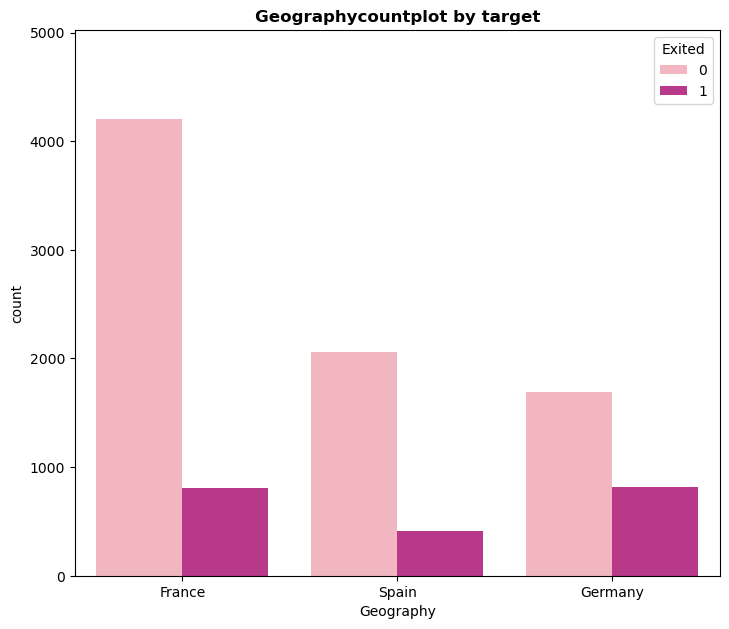

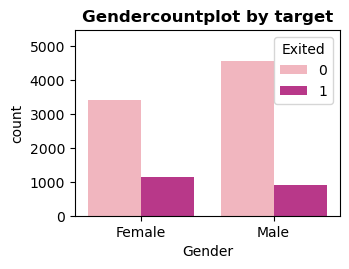

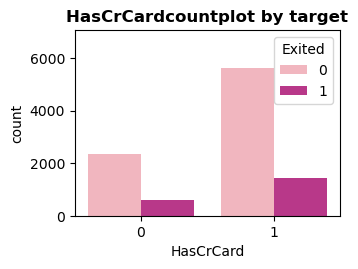

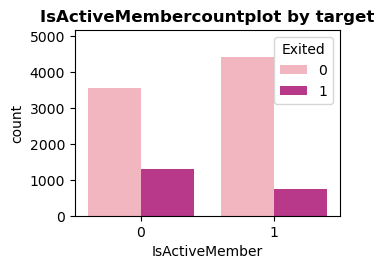

In [4]:
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

num_cols = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']
target = 'Exited'



plt.figure(figsize=(14,len(categorical_cols)*3))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols)//2 + len(categorical_cols)%2,2,i+1)
    
    sns.countplot(x=col,hue=target,data=df,palette='RdPu')
    plt.title(f"{col}countplot by target",fontweight='bold')
    plt.ylim(0,df[col].value_counts().max()+10)
    
    plt.tight_layout()
    plt.show()

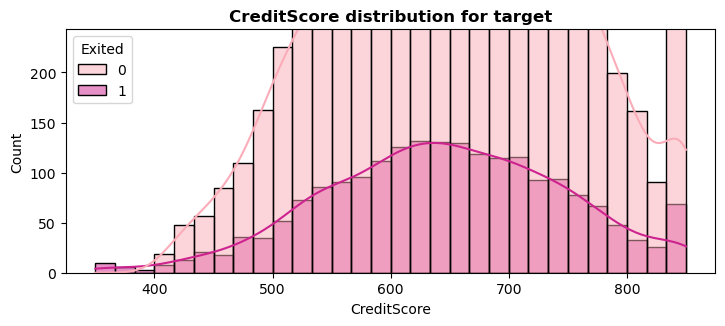

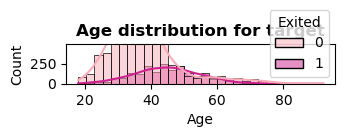

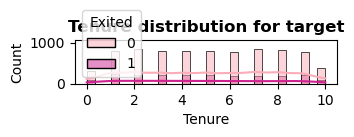

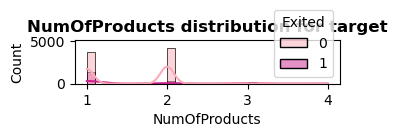

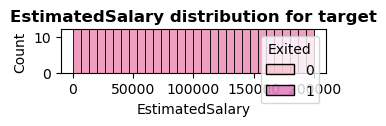

In [5]:
plt.figure(figsize=(14, len(num_cols) * 3))

for i, col in enumerate(num_cols):
    # plotting for outcome
    plt.subplot(len(num_cols),2,i+1)
    
    sns.histplot(x=col,hue=target,data=df,bins=30,kde=True,palette='RdPu')
    plt.title(f"{col} distribution for target",fontweight='bold')
    plt.ylim(0,df[col].value_counts().max()+10)
    
    plt.tight_layout()
    plt.show()

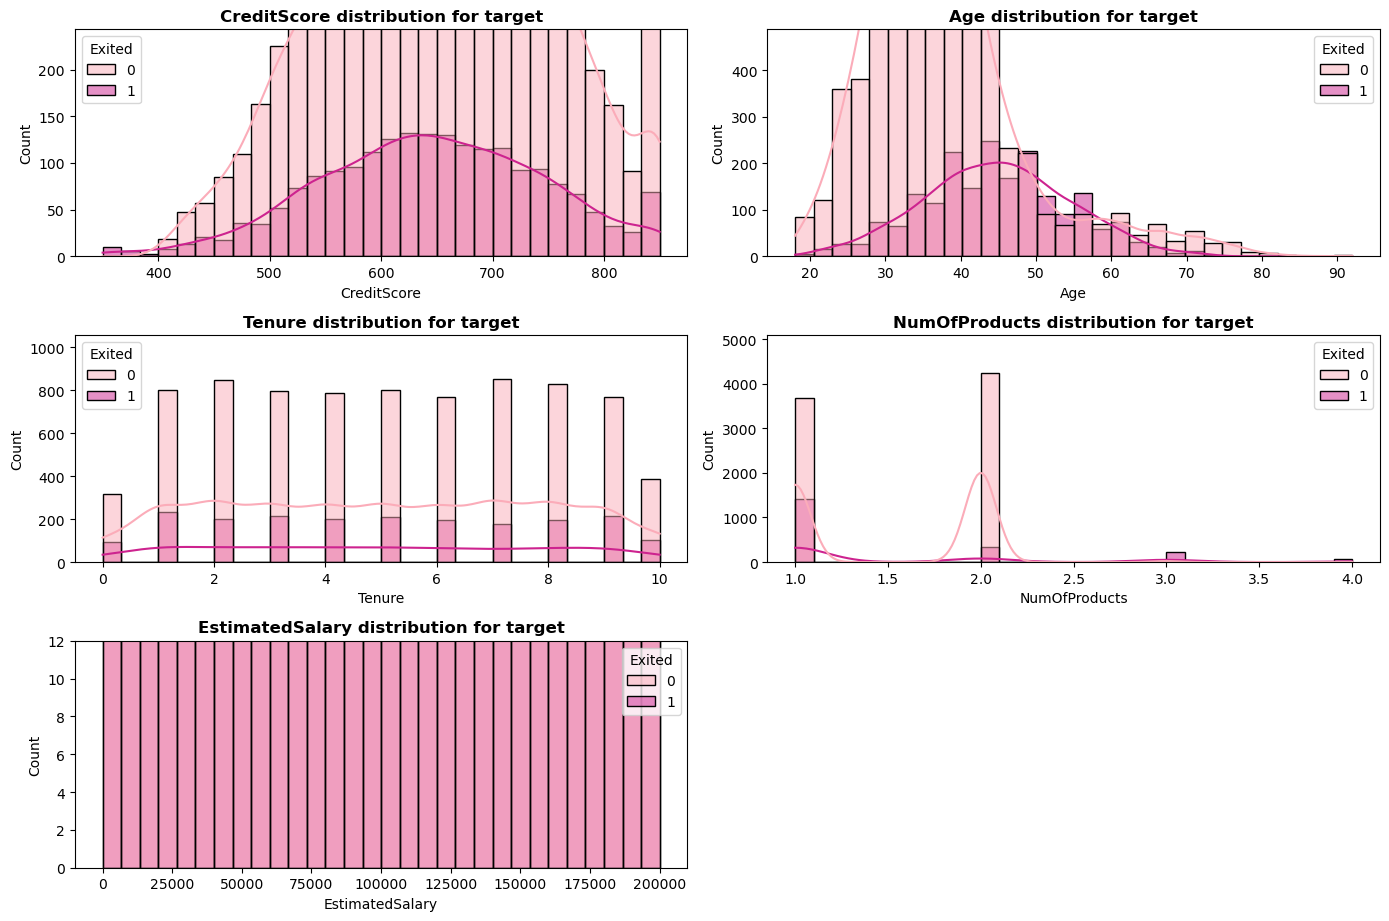

In [6]:
plt.figure(figsize=(14, len(num_cols) * 3))

for i, col in enumerate(num_cols):
    # plotting for outcome
    plt.subplot(len(num_cols), 2, i+1)
    sns.histplot(x=col, hue=target, data=df, bins=30, kde=True, palette='RdPu')
    plt.title(f"{col} distribution for target", fontweight='bold')
    plt.ylim(0, df[col].value_counts().max() + 10)

plt.tight_layout()
plt.show()

C:\Users\subha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


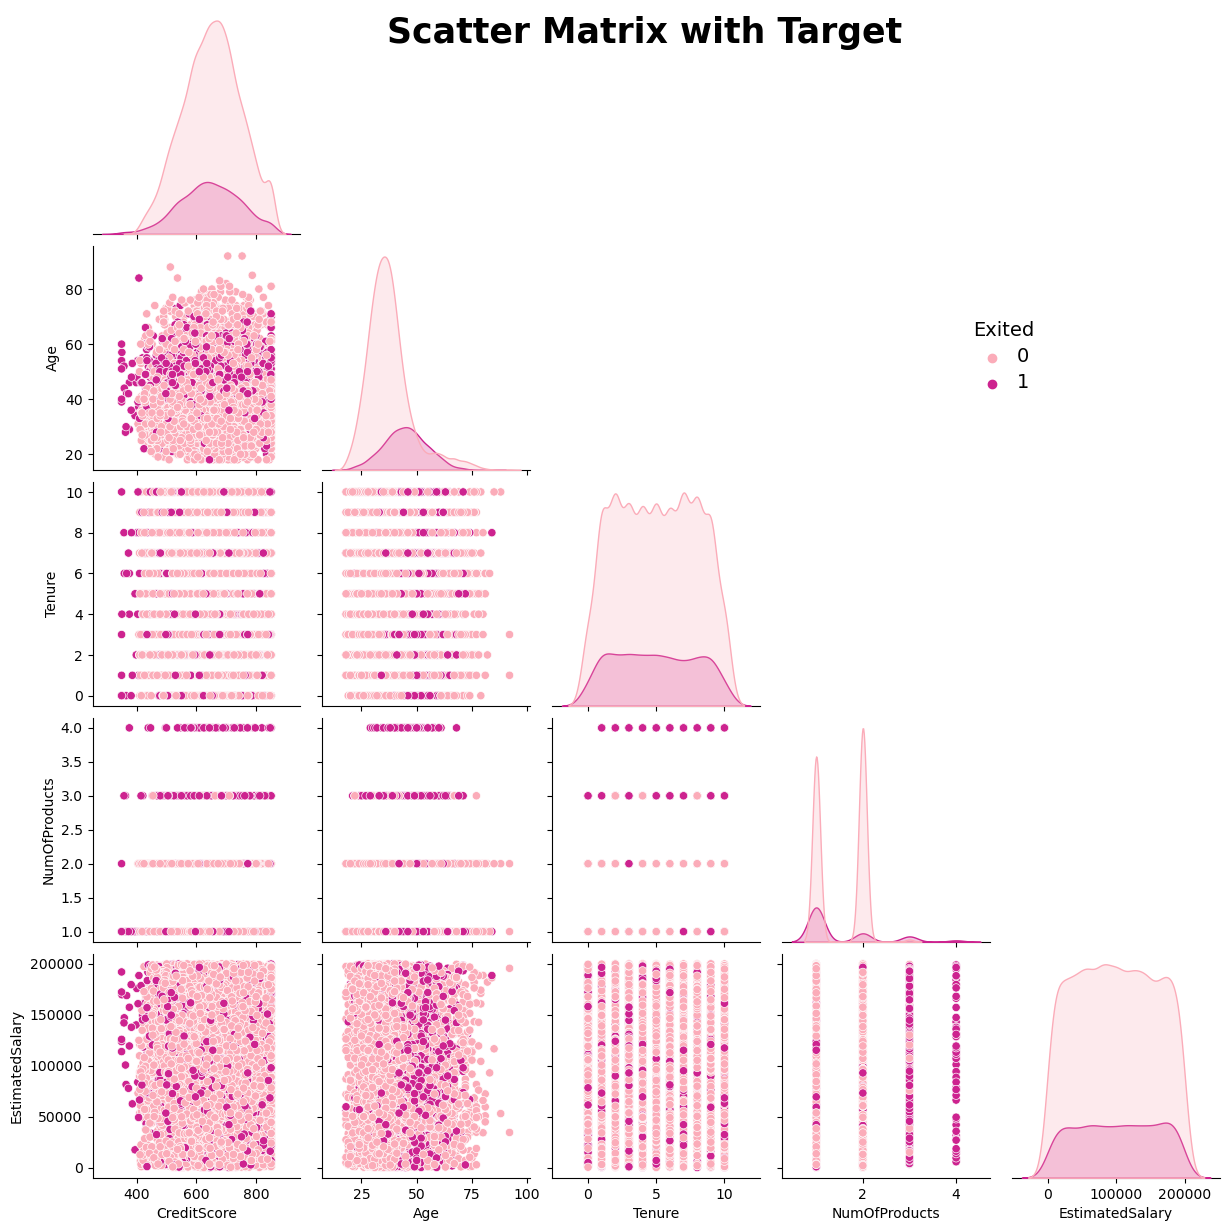

In [7]:
def plot_pair(df,num_var,target,plotname):
    '''
    Funtion to make a pairplot:
    df_train: total data
    num_var: a list of numeric variable
    target: target variable
    '''
    g = sns.pairplot(data=df, x_vars=num_var, y_vars=num_var, hue=target, corner=True,  palette='RdPu')
    g._legend.set_bbox_to_anchor((0.8, 0.7))
    g._legend.set_title(target)
    g._legend.loc = 'upper left'
    g._legend.get_title().set_fontsize(14)
    for item in g._legend.get_texts():
        item.set_fontsize(14)

    plt.suptitle(plotname, ha='center', fontweight='bold', fontsize=25, y=0.98)
    plt.show()

plot_pair(df, num_cols, target, plotname = 'Scatter Matrix with Target')

##  Data cleaning

In [8]:
scale_cols = ['Age','CreditScore', 'Balance','EstimatedSalary']
###
for c in scale_cols:
    min_value = df[c].min()
    max_value = df[c].max()
    df[c+"_scaled"] = (df[c] - min_value) / (max_value - min_value)


In [9]:
df.drop(['CustomerId'],axis=1,inplace=True) # 'Surname'

In [10]:
#transform surename
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
label_enc = LabelEncoder()

df["Surname"] = label_enc.fit_transform(df[["Surname"]])

df['logarithm_balance'] = np.log1p(df['Balance'])

df['logarithm_salary'] = np.log1p(df['EstimatedSalary'])


C:\Users\subha\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [12]:
label_enc = LabelEncoder()

df["Geography"] = label_enc.fit_transform(df[["Geography"]])

C:\Users\subha\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# Featurew engineering

def getFeats(df):
    
    df['IsSenior'] = df['Age'].apply(lambda x: 1 if x >= 60 else 0)
    df['IsActive_by_CreditCard'] = df['HasCrCard'] * df['IsActiveMember']
    df['Products_Per_Tenure'] =  df['Tenure'] / df['NumOfProducts']
    df['AgeCat'] = np.round(df.Age/20).astype('int')
    
    return df


df = getFeats(df)


####  x & y

In [15]:
x = df.drop('Exited',axis=1)
y = df['Exited']

###  Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.2,random_state=16)

#### 
       . Train size = 10000*0.8 = 8000
       . Test size =  10000*0.2 = 2000

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train.iloc[:,1:8] = sc.fit_transform(x_train.iloc[:,1:8])
x_test.iloc[:,1:8] = sc.transform(x_test.iloc[:,1:8])

#  Modelling

### Logistic Regression

In [19]:
# Modelling (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [24]:
# Prediction
ypred_train = log_reg.predict(x_train)

# Train Accuracy
from sklearn.metrics import accuracy_score
print("Train accuracy:",accuracy_score(y_train,ypred_train))

# Cross Validation Score
from sklearn.model_selection import cross_val_score
print("CV Score:",cross_val_score(log_reg,x_train,y_train,cv=5,scoring='accuracy'))

ypred_test = log_reg.predict(x_test)
print("Test accuracy:",accuracy_score(y_test,ypred_test))

Train accuracy: 0.797
CV Score: [0.7975   0.796875 0.796875 0.796875 0.796875]
Test accuracy: 0.7935


###  Random Forest

In [26]:
# Random forest Classifier with default parameters
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=6)
model.fit(x_train,y_train)

# Prediction
ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train accuracy:",accuracy_score(ypred_train,y_train))
print("Test accuracy:",accuracy_score(ypred_test,y_test))

from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(model,x_train,y_train,cv=5).mean())

Train accuracy: 1.0
Test accuracy: 0.8565
Cross Validation Score: 0.856625


In [27]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model
estimator = RandomForestClassifier(random_state=0)

# parameters (which you want to tune and identify the best)
param_grid = {'n_estimators':list(range(1,101))}

grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)

grid.fit(x_train,y_train)

grid.best_params_


{'n_estimators': 82}

###  Importance of each features  given by the model

In [28]:
grid.best_estimator_.feature_importances_

array([0.05820837, 0.05855929, 0.05286763, 0.02184728, 0.01219211,
       0.10557468, 0.03303189, 0.04893192, 0.10064294, 0.00831428,
       0.03146239, 0.05267404, 0.08875712, 0.0541769 , 0.04776511,
       0.05202261, 0.04702104, 0.05102095, 0.00242176, 0.01532332,
       0.03900967, 0.0181747 ])

In [29]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                    index=x.columns,
                    columns=['Feature Importance'])

feats_imp = feats[feats['Feature Importance']>0]

important_features_list = feats_imp.index.to_list()


## Final Random forest model

####  With best parameters and  important features

In [1]:
# input with important features
x_imp = x[important_features_list]

# train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_imp,y,test_size=0.2,random_state=6)
# Model with best hyperparameters
final_rf_model = RandomForestClassifier(n_estimators=12,random_state=0)
final_rf_model.fit(x_train,y_train)

ypred_train = final_rf_model.predict(x_train)
ypred_test = final_rf_model.predict(x_test)

# Evaluation
print("Train accuracy:",accuracy_score(ypred_train,y_train))
print("Test accuracy:",accuracy_score(ypred_test,y_test))
print("Cross Validation Score:",cross_val_score(final_rf_model,x_imp,y,cv=5).mean())

NameError: name 'x' is not defined

##  Gradient Boosting

###  Identify best parameter for Gradient boost model using hyperparameter tuning

In [33]:
from sklearn.model_selection import GridSearchCV

# Model/Estimator
from sklearn.ensemble import GradientBoostingClassifier
estimator_gb = GradientBoostingClassifier()
 
# prameters grid
param_grid = {"n_estimators":[1,5,10,20],
             "learning_rate":[0.1,0.2,0.3,0.5,0.8,1]}

# grid Search
grid_gb = GridSearchCV(estimator_gb, param_grid,cv=5,scoring='accuracy')
grid_gb.fit(x_train,y_train)

# Best parameter for gradientBood=st Model
grid_gb.best_params_

{'learning_rate': 0.3, 'n_estimators': 20}

###  Gradient Boost model important features

In [34]:
feats_gb = pd.DataFrame(index = x.columns,
                       data   = grid_gb.best_estimator_.feature_importances_,
                       columns = ['Importance'])
important_features_gb = feats_gb[feats_gb['Importance']>0.01]
imp_features_list_gb = feats_gb[feats_gb['Importance']>0.01].index.to_list()

In [35]:
x_imp = x[imp_features_list_gb]    # dropped unimportant
imp_features_list_gb = ['feature1', 'feature2', 'feature3']


x_train_gb, x_test_gb, y_train_gb, y_test_gb = train_test_split(x_imp,y,test_size=0.2,random_state=101)

# Modelling
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=10,learning_rate=0.8)
gb.fit(x_train_gb,y_train_gb)

# Evaluation
ypred_train = gb.predict(x_train_gb)
print("Train accuracy:",accuracy_score(y_train_gb,ypred_train))

# Cross Validation
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(gb,x_train_gb,y_train_gb,cv=5).mean())

# Evaluation of test data
ypred_test = gb.predict(x_test_gb)
print("Test accuracy:",accuracy_score(y_test_gb,ypred_test))

Train accuracy: 0.86775
Cross Validation Score: 0.85625
Test accuracy: 0.8695


In [40]:
feature_importances = model.feature_importances_

# Create a list of feature names
feature_names = ["Feature_" + str(i) for i in range(x.shape[1])]  # Replace with actual feature names if available

# Create a dictionary of feature names and their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance value in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or display the sorted feature importances
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Feature_8, Importance: 0.10352128733334447
Feature: Feature_5, Importance: 0.09715705611859896
Feature: Feature_12, Importance: 0.08974376056308135
Feature: Feature_0, Importance: 0.059917722542291024
Feature: Feature_1, Importance: 0.05880150393929315
Feature: Feature_2, Importance: 0.054514082684019305
Feature: Feature_13, Importance: 0.05245359927365861
Feature: Feature_17, Importance: 0.05179254818605463
Feature: Feature_15, Importance: 0.051640351828803784
Feature: Feature_11, Importance: 0.05053143041047355
Feature: Feature_7, Importance: 0.04859040469815917
Feature: Feature_14, Importance: 0.04768652062778044
Feature: Feature_16, Importance: 0.04672482529181757
Feature: Feature_20, Importance: 0.03954626597843339
Feature: Feature_6, Importance: 0.0325232330865685
Feature: Feature_10, Importance: 0.03028707287237653
Feature: Feature_3, Importance: 0.02246419036055446
Feature: Feature_21, Importance: 0.020890204093552092
Feature: Feature_19, Importance: 0.0163474626727645

##  Final Model
     . By Applying Logistic Regression , Random Forest & Gradient boost Models , i get the Better accuracy in Gradient Boost Model.
     
     So this is the model we can use for prediction and Get More Accuracy.

### Prediction on new data

In [45]:
x_train

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,Age_scaled,CreditScore_scaled,Balance_scaled,EstimatedSalary_scaled,logarithm_balance,logarithm_salary,IsSenior,IsActive_by_CreditCard,Products_Per_Tenure,AgeCat
8247,8248,2541,505,1,0,25,5,114268.85,2,1,...,0.094595,0.310,0.455439,0.633644,11.646318,11.749808,0,1,2.500000,1
705,706,2788,750,1,1,40,5,168286.81,3,1,...,0.297297,0.800,0.670738,0.102212,12.033431,9.925884,0,0,1.666667,2
4451,4452,2031,578,0,1,34,4,175111.11,1,1,...,0.216216,0.456,0.697937,0.374269,12.073182,11.223366,0,1,4.000000,2
4328,4329,1195,581,0,0,55,6,0.00,1,1,...,0.500000,0.462,0.000000,0.112163,0.000000,10.018740,0,1,6.000000,3
3882,3883,259,488,0,0,22,6,0.00,2,1,...,0.054054,0.276,0.000000,0.331943,0.000000,11.103375,0,1,3.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9040,9041,2567,581,1,0,38,3,135157.05,1,1,...,0.270270,0.462,0.538693,0.164555,11.814200,10.401848,0,1,3.000000,2
8527,8528,1252,694,2,1,39,3,0.00,1,1,...,0.283784,0.688,0.000000,0.478113,0.000000,11.468200,0,1,3.000000,2
4714,4715,1356,567,0,0,23,9,93522.20,1,0,...,0.067568,0.434,0.372750,0.407109,11.445965,11.307457,0,0,9.000000,1
8419,8420,1195,677,1,0,26,6,98723.67,1,0,...,0.108108,0.654,0.393481,0.755748,11.500090,11.926013,0,0,6.000000,1


In [46]:
x_test

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,Age_scaled,CreditScore_scaled,Balance_scaled,EstimatedSalary_scaled,logarithm_balance,logarithm_salary,IsSenior,IsActive_by_CreditCard,Products_Per_Tenure,AgeCat
739,740,2061,692,0,0,28,8,95059.02,2,1,...,0.135135,0.684,0.378875,0.222064,11.462264,10.701472,0,0,4.0,1
9426,9427,454,499,2,0,53,1,75225.53,2,0,...,0.472973,0.298,0.299825,0.724257,11.228259,11.883455,0,0,0.5,3
8200,8201,239,767,2,1,47,5,0.00,1,1,...,0.391892,0.834,0.000000,0.609823,0.000000,11.711493,0,0,5.0,2
5880,5881,1062,537,0,1,28,0,88963.31,2,1,...,0.135135,0.374,0.354579,0.949232,11.395991,12.153942,0,1,0.0,1
9114,9115,989,541,0,1,36,5,0.00,2,1,...,0.243243,0.382,0.000000,0.623981,0.000000,11.734442,0,0,2.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,1332,532,849,1,1,37,7,143452.74,2,1,...,0.256757,0.998,0.571757,0.086421,11.873768,9.758180,0,1,3.5,2
3820,3821,2508,576,0,1,39,9,84719.98,1,0,...,0.283784,0.452,0.337667,0.955350,11.347119,12.160366,0,0,9.0,2
2866,2867,1073,727,0,0,26,9,121508.28,1,1,...,0.108108,0.754,0.484293,0.733939,11.707746,11.896734,0,1,9.0,1
3108,3109,515,560,2,0,28,1,0.00,2,1,...,0.135135,0.420,0.000000,0.604403,0.000000,11.702568,0,1,0.5,1


In [47]:
x_train.column

Index(['RowNumber', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Age_scaled', 'CreditScore_scaled', 'Balance_scaled',
       'EstimatedSalary_scaled', 'logarithm_balance', 'logarithm_salary',
       'IsSenior', 'IsActive_by_CreditCard', 'Products_Per_Tenure', 'AgeCat'],
      dtype='object')